## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Load Data

In [2]:
df = pd.read_csv('diabetes.csv') #load data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Analyse Data

In [3]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

**Total features** - 9 

**Target feature** - Outcome, here **0** means no diabetes, **1** means diabetes

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see here that - 
* We have total **767** samples
* Around 34% samples have diabetes
* Samples are between **21 to 81** age range
* We can see here, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction have minimum value as 0.

**Which features contain blank, null or empty values?**

In [5]:
df.isnull().sum().sort_values(ascending=False)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64

Here although we have no missing values but we have some **unexpected outliers**.
As we observed above some featues have minimum value = 0
1. Blood pressure of a living person cannot be 0,
2. Glucose level cannot be as low as 0,
3. Skin fold thickness can't be less than 10 mm,
4. BMI should not be 0 or close to 0 unless the person is really underweight whick could be life threatening.
5. In rare situation a person can have zero insulin.

**Which features contain zero as minimum values?**

In [6]:
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     499
dtype: int64

1. **BloodPressure have 35 samples, BMI have 11 samples and Glucose have 5 samples with min value zero** We will remove this samples from our dataset
2. **Insulin, SkinThickness** have large number of samples with min value zero.

In [7]:
df_new = df[(df.BloodPressure!=0) & (df.BMI!=0) & (df.Glucose!=0)]
df_new.shape

(723, 9)

In [8]:
df_new.groupby('Outcome').size()

Outcome
0    474
1    249
dtype: int64

Good news, No feature have missing value

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

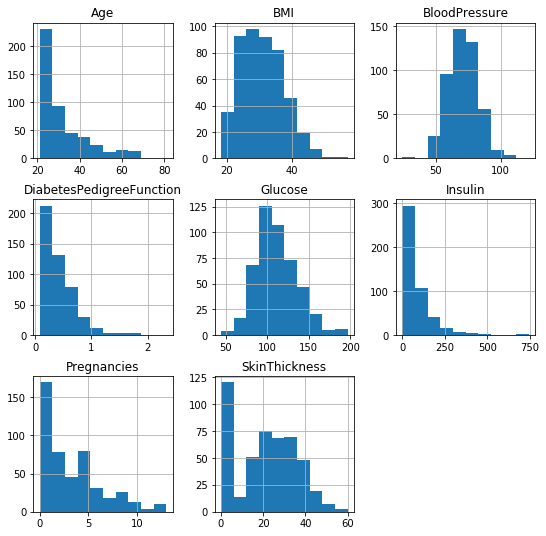

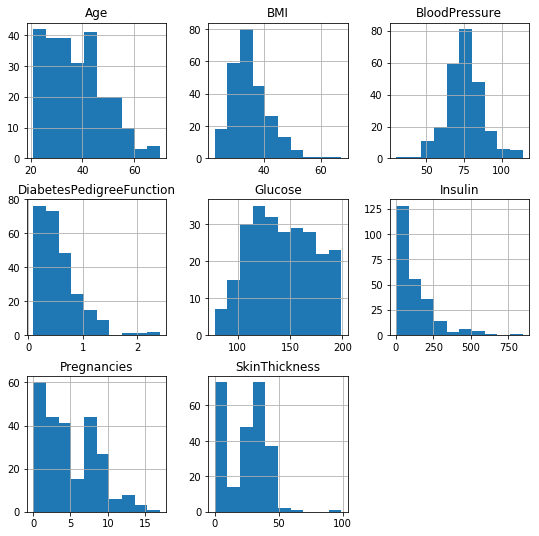

In [9]:
df_new.groupby('Outcome').hist(figsize=(9,9))

## Feature Selection

In [10]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 
                 'SkinThickness', 'Insulin', 'BMI', 
                 'DiabetesPedigreeFunction', 'Age']

X = df_new[feature_names]
y = df_new.Outcome

## Train/Test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_new.Outcome, test_size=0.3, random_state=42)

In [12]:
print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 506
Testing data size: 217


## Model Selection

In [13]:
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

In [14]:
names=[]
scores=[]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
result = pd.DataFrame({'Name': names, 'Score': scores})
result.sort_values(by='Score', ascending=False)

,Name,Score
2,KNN,0.755760
0,LR,0.751152
6,RF,0.746544
1,LDA,0.737327
7,GBC,0.737327
4,NB,0.709677
3,DT,0.677419
5,SVM,0.654378


We can see the Logistic Regression, Gradient Boosting Classifier, Random Forest and LinearDiscriminantAnalysis have performed better than the rest.

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

acc_log = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_log, '%')

75.12 %


In [16]:
print (logreg.predict([[1,93,70,31,0,30.4,0.315,23]]))

[0]
